## Labels
Labels are composed of 3 parts:
* class (there are 13 possible classes) - 13 values
* bounding box predicted by the (i,j) cell - 4 values (c1,c2), w, h

In [8]:
import os
import pandas as pd
import random as rand
from IPython.display import clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
#TODO Convert labels from the original format of the dataset to (x1,x2,y1,y2,class). We are interested in annotation['item1']['bounding_box'] and annotation['item1']['category_id']. Note there can be more than one item per image
#TODO Convert labels from (x1,x2,y1,y2,class) to (c1,c2,height,width,confidence,class) 
#        (confidence is the IoU between the bounding box of the prediction and the bounding box of the ground truth, in the labels it must be set to one)
class DataLoader:
    annotations = {}
    images = []
    random_shuffling_for_file_indexes = []
    
    
    def __init__(self, number_of_samples, images_folder, annotations_folder, normalize=True, randomize=True):
        self.number_of_samples = number_of_samples
        self.images_folder = images_folder
        self.annotations_folder = annotations_folder
        if randomize:
            self._random_shuffling()
        self.images = self.load_n_images()
        self.annotations = self.load_n_annotations()
        if normalize:
            self.normalize_image()
    
    #use the same shuffling for both images and annotations
    def _random_shuffling(self):
        self.random_shuffling_for_file_indexes = [i for i in range(0, len(self.get_file_names_in_directory(self.images_folder)))]
        rand.shuffle(self.random_shuffling_for_file_indexes)

    def get_file_names_in_directory(self,directory_path):
        res = []
        for path in os.listdir(directory_path):
            # check if current path is a file
            if os.path.isfile(os.path.join(directory_path, path)):
                res.append(path)
        return res

    def load_n_annotations(self):
        annotation = []
        counter = 0
        file_names = self.get_file_names_in_directory(self.annotations_folder)
        for i in range(0, self.number_of_samples):
            clear_output(wait=True)
            annotation.append(pd.read_json(os.path.join(self.annotations_folder, file_names[self.random_shuffling_for_file_indexes[i]])))
            counter = counter + 1
            print(str(counter / self.number_of_samples) + " %")
        return annotation

    
    def load_n_images(self):
        images = []
        counter = 0
        images_names = self.get_file_names_in_directory(self.images_folder)
        for i in range(0, self.number_of_samples):
            clear_output(wait=True)
            images.append(mpimg.imread(os.path.join(self.images_folder, images_names[self.random_shuffling_for_file_indexes[i]])))
            counter = counter + 1
            print(str(counter / self.number_of_samples) + " %")
        return images
    
    def normalize_image(self):
        for i in range(0, len(self.images)):
            self.images[i] = self.images[i] / 255

In [9]:
images_train_folder_path = "../Object-Detection-Deep-Fashion/Data/train/images/"
annotations_train_folder_path = "../Object-Detection-Deep-Fashion/Data/train/annotations/"
images_test_folder_path = "../Object-Detection-Deep-Fashion/Data/test/images/"
annotations_test_folder_path = "../Object-Detection-Deep-Fashion/Data/test/annotations/"

# images_train_folder_path = "D:/Deep_learning_laboratory/object detection/assignment_1/train/images"
# annotations_train_folder_path = "D:/Deep_learning_laboratory/object detection/assignment_1/train/annotations"
# images_test_folder_path = "D:/Deep_learning_laboratory/object detection/assignment_1/test/images"
# annotations_test_folder_path = "D:/Deep_learning_laboratory/object detection/assignment_1/test/annotations"

In [28]:
def get_file_names_in_directory(directory_path):
        res = []
        for path in os.listdir(directory_path):
            # check if current path is a file
            if os.path.isfile(os.path.join(directory_path, path)):
                res.append(path)
        return res

In [29]:
dataset_1000_examples = DataLoader(number_of_samples = 1000,
               images_folder = images_train_folder_path,
               annotations_folder = annotations_train_folder_path)

1.0 %


In [30]:
assert len(dataset_1000_examples.images) == 1000
assert len(dataset_1000_examples.annotations) == 1000

In [35]:
#Plot an annotation
dataset_1000_examples.annotations[0]

,source,pair_id,item1
bounding_box,shop,4573,"[65, 58, 548, 816]"
category_id,shop,4573,10
category_name,shop,4573,short sleeve dress
landmarks,shop,4573,"[319, 110, 1, 394, 100, 1, 0, 0, 0, 0, 0, 0, 0..."
occlusion,shop,4573,2
scale,shop,4573,3
segmentation,shop,4573,"[[204.0, 86.0, 205.27, 129.07, 197.47, 157.17,..."
style,shop,4573,2
viewpoint,shop,4573,3
zoom_in,shop,4573,2


### Check the number of Labels - 13 labels

In [32]:
def count_labels(dataset):
    category_ids_already_found = []
    for i in range(0, len(dataset.annotations)):
        actualCategoryId = dataset.annotations[i]["item1"]["category_id"]
        if(not(actualCategoryId in category_ids_already_found)):
            category_ids_already_found.append(actualCategoryId)
    return category_ids_already_found

In [33]:
#test "count the number of categories. There should be 13"
assert len(count_labels(dataset_1000_examples)) == 13

### Draw a box from a training sample to see what the json label represents

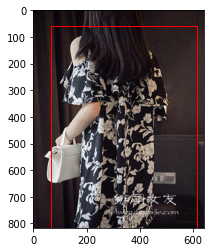

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

bounding_box_sample_1 = dataset_1000_examples.annotations[0]["item1"]["bounding_box"]
# Create figure and axes
fig, ax = plt.subplots()

# Display the image
ax.imshow(dataset_1000_examples.images[0])

# Create a Rectangle patch
rect1 = patches.Rectangle((bounding_box_sample_1[0], bounding_box_sample_1[1]), bounding_box_sample_1[2], bounding_box_sample_1[3], linewidth=1, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect1)

plt.show()

## Data we are going to use
We are going to use category and bounding box data, out objective is object detection, hence we will ignore data about segmentation, localization, etc.

## Preprocess
We are going to squash the data into a [0,1] range with normalization for the dataset (faster learning). Before normalization we will apply some data augmentation.
(move this above, we did normalization in the DataLoader class)

In [ ]:
#4) load resnet pretrained model

In [ ]:
#5) build the architecture

In [ ]:
#6) implement metrics, training cycle, backprop

In [ ]:
#7) evaluate model on test set

In [ ]:
#8) show some results